In [0]:
import pandas as pd

In [1]:
df = pd.read_csv('/content/drive/My Drive/CA683 Data Mining/Continuous Assignment/DataMining_Assignment/Data/df_clean_with_score.csv',index_col=0)

NameError: ignored

In [2]:
path = "/content/drive/My Drive/CA683 Data Mining/Continuous Assignment/InsideAirbnb/data/"
calendar = pd.read_csv(path+"calendar.csv")
listings = pd.read_csv(path+"listings.csv")
reviews = pd.read_csv(path+"reviews.csv")

NameError: ignored

In [0]:
#@title Drop missing value
# nan_list = df[df['score'].isnull()].index.tolist()
# print(len(nan_list))
# df = df.drop(nan_list)
# df.head(3)

In [0]:
df_sentiment = pd.read_csv('/content/drive/My Drive/CA683 Data Mining/Continuous Assignment/DataMining_Assignment/Data/df_sentiment_combined.csv')

In [0]:
sentiment_list = ['id', 'summary_sentiment_neg',
       'summary_sentiment_neu', 'summary_sentiment_pos',
       'summary_sentiment_compound', 'space_sentiment_neg',
       'space_sentiment_neu', 'space_sentiment_pos',
       'space_sentiment_compound','description_sentiment_neg',
       'description_sentiment_neu', 'description_sentiment_pos',
       'description_sentiment_compound',
       'neighborhood_overview_sentiment_neg',
       'neighborhood_overview_sentiment_neu',
       'neighborhood_overview_sentiment_pos',
       'neighborhood_overview_sentiment_compound',
       'notes_sentiment_neg', 'notes_sentiment_neu', 'notes_sentiment_pos',
       'notes_sentiment_compound','transit_sentiment_neg',
       'transit_sentiment_neu', 'transit_sentiment_pos',
       'transit_sentiment_compound','access_sentiment_neg',
       'access_sentiment_neu', 'access_sentiment_pos',
       'access_sentiment_compound', 'interaction_sentiment_neg',
       'interaction_sentiment_neu', 'interaction_sentiment_pos',
       'interaction_sentiment_compound',
       'house_rules_sentiment_neg', 'house_rules_sentiment_neu',
       'house_rules_sentiment_pos', 'house_rules_sentiment_compound',
       'host_about_sentiment_neg', 'host_about_sentiment_neu',
       'host_about_sentiment_pos', 'host_about_sentiment_compound']

In [0]:
df_sentiment_value = df_sentiment[sentiment_list]

In [0]:
df_sentiment_value.head()

,id,summary_sentiment_neg,summary_sentiment_neu,summary_sentiment_pos,summary_sentiment_compound,space_sentiment_neg,space_sentiment_neu,space_sentiment_pos,space_sentiment_compound,description_sentiment_neg,description_sentiment_neu,description_sentiment_pos,description_sentiment_compound,neighborhood_overview_sentiment_neg,neighborhood_overview_sentiment_neu,neighborhood_overview_sentiment_pos,neighborhood_overview_sentiment_compound,notes_sentiment_neg,notes_sentiment_neu,notes_sentiment_pos,notes_sentiment_compound,transit_sentiment_neg,transit_sentiment_neu,transit_sentiment_pos,transit_sentiment_compound,access_sentiment_neg,access_sentiment_neu,access_sentiment_pos,access_sentiment_compound,interaction_sentiment_neg,interaction_sentiment_neu,interaction_sentiment_pos,interaction_sentiment_compound,house_rules_sentiment_neg,house_rules_sentiment_neu,house_rules_sentiment_pos,house_rules_sentiment_compound,host_about_sentiment_neg,host_about_sentiment_neu,host_about_sentiment_pos,host_about_sentiment_compound
0,44077,0.000,0.870,0.130,0.9167,0.009,0.832,0.159,0.9826,0.000,0.854,0.146,0.9808,0.061,0.809,0.130,0.7003,0.000,0.755,0.245,0.9136,0.041,0.959,0.000,-0.2960,0.000,0.831,0.169,0.8750,0.0,0.831,0.169,0.6249,0.000,0.838,0.162,0.9747,0.000,0.584,0.416,0.9786
1,85148,0.000,0.000,0.000,0.0000,0.023,0.886,0.091,0.9231,0.023,0.886,0.091,0.9231,0.000,0.000,0.000,0.0000,0.000,0.000,0.000,0.0000,0.000,0.000,0.000,0.0000,0.000,0.000,0.000,0.0000,0.0,0.000,0.000,0.0000,0.363,0.637,0.000,-0.5719,0.067,0.774,0.159,0.9499
2,85156,0.017,0.876,0.107,0.8658,0.000,0.927,0.073,0.9214,0.009,0.896,0.096,0.9544,0.011,0.777,0.212,0.9906,0.000,0.688,0.312,0.8957,0.000,0.941,0.059,0.9107,0.000,0.815,0.185,0.7783,0.0,0.717,0.283,0.9300,0.000,0.832,0.168,0.9756,0.000,0.584,0.416,0.9786
3,121030,0.000,0.807,0.193,0.8439,0.011,0.869,0.120,0.9660,0.000,0.856,0.144,0.9778,0.000,0.719,0.281,0.9454,0.000,0.906,0.094,0.4019,0.000,1.000,0.000,0.0000,0.000,0.898,0.102,0.3612,0.0,1.000,0.000,0.0000,0.107,0.717,0.176,0.7370,0.000,0.715,0.285,0.9937
4,159889,0.000,0.957,0.043,0.0772,0.000,0.859,0.141,0.9769,0.000,0.870,0.130,0.9719,0.000,0.811,0.189,0.4215,0.073,0.927,0.000,-0.2960,0.000,0.655,0.345,0.5766,0.041,0.907,0.052,0.1531,0.0,1.000,0.000,0.0000,0.000,1.000,0.000,0.0000,0.000,0.869,0.131,0.6792


In [0]:
df_sentiment.shape

(9143, 52)

# NLP based Features

### drop wrong rows

In [0]:
df_features = pd.read_csv('/content/drive/My Drive/CA683 Data Mining/Continuous Assignment/DataMining_Assignment/Data/raw_clean_features.csv',index_col=0)

In [0]:
df_features = df_features.reset_index()

In [0]:
df_features.head(1)

,index,id,rcommon,wordCount,charNum,avgWordLen,stopWords,numeric_num,noun_count,verb_count,adj_count,adv_count,pron_count
0,0.0,44077,built 1937 plenty land originally dundrum cons...,220,1358,6.172727,0,8,96,37,44,19,0


In [0]:
outlier=[]
for i in list(df_features['id'].unique()):
  if len(i)>10:
    print(i)
    outlier.append(i)

cosy apartment available december 2nd december 12th inclusive fantastic location rathmines ranelagh making ideal anyone working city simply visiting dublin bus stop right outside apartment renelagh luas stop 5mins walk regular buses city centre airport train etc city centre grafton street 20mins walk parking incl fantastic cafes restaurants bars within walking distanceour cosy apartment available december 2nd december 12th inclusive fantastic location rathmines ranelagh making ideal anyone working city simply visiting dublin bus stop right outside apartment renelagh luas stop 5mins walk regular buses city centre airport train etc city centre grafton street 20mins walk parking incl fantastic cafes restaurants bars within walking distance local area fantastic abundance really great cafes bars restaurants within walking distance bus tram 5min walk regular service city centre shopping centres train airport etcentire apartment bedroom bathroom kitchen sitting roomi meet checkin travel food 

In [0]:
o_list = df_features[df_features['id'].isin(outlier)].index.tolist()
df_features = df_features.drop(o_list)

In [0]:
o_list

[2294, 2463]

In [0]:
df_feature_list = ['id']+list(df_features.columns[3:])

In [0]:
df_feature_value = df_features[df_feature_list]
df_feature_value.head()

,id,wordCount,charNum,avgWordLen,stopWords,numeric_num,noun_count,verb_count,adj_count,adv_count,pron_count
0,44077,220,1358,6.172727,0,8,96,37,44,19,0
1,85148,136,628,4.617647,1,3,74,15,26,5,0
2,85156,268,1585,5.914179,0,17,129,42,43,21,0
3,121030,203,1109,5.463054,0,8,92,36,42,8,0
4,159889,120,697,5.808333,0,0,67,23,14,4,0


# numeric features

In [0]:
df_numeric = pd.read_csv('/content/drive/My Drive/CA683 Data Mining/Continuous Assignment/DataMining_Assignment/Data/listings_imputed.csv',index_col=0)

In [0]:
df_numeric.shape

(9143, 15)

In [0]:
df_numeric.head()

,id,host_listings_count,host_total_listings_count,price,security_deposit,cleaning_fee,guests_included,extra_people,number_of_reviews,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,score
0,44077,3.0,3.0,50,0,10,1,0,227,38,3,0,3,0,100.000000
1,85148,1.0,1.0,30,0,0,1,10,1,1,1,0,1,0,NaN
2,85156,3.0,3.0,50,0,10,1,0,182,47,3,0,3,0,98.333333
3,121030,4.0,4.0,55,0,0,1,13,110,0,3,0,3,0,91.666667
4,159889,0.0,0.0,29,0,16,1,0,311,54,3,0,3,0,98.333333


# combined Features

In [0]:
df_score = pd.read_csv('/content/drive/My Drive/CA683 Data Mining/Continuous Assignment/DataMining_Assignment/Data/df_clean_with_score.csv',index_col=0)

In [0]:
df_score.shape

(9143, 5)

In [0]:
df_sentiment_value.head(3)

,id,summary_sentiment_neg,summary_sentiment_neu,summary_sentiment_pos,summary_sentiment_compound,space_sentiment_neg,space_sentiment_neu,space_sentiment_pos,space_sentiment_compound,description_sentiment_neg,description_sentiment_neu,description_sentiment_pos,description_sentiment_compound,neighborhood_overview_sentiment_neg,neighborhood_overview_sentiment_neu,neighborhood_overview_sentiment_pos,neighborhood_overview_sentiment_compound,notes_sentiment_neg,notes_sentiment_neu,notes_sentiment_pos,notes_sentiment_compound,transit_sentiment_neg,transit_sentiment_neu,transit_sentiment_pos,transit_sentiment_compound,access_sentiment_neg,access_sentiment_neu,access_sentiment_pos,access_sentiment_compound,interaction_sentiment_neg,interaction_sentiment_neu,interaction_sentiment_pos,interaction_sentiment_compound,house_rules_sentiment_neg,house_rules_sentiment_neu,house_rules_sentiment_pos,house_rules_sentiment_compound,host_about_sentiment_neg,host_about_sentiment_neu,host_about_sentiment_pos,host_about_sentiment_compound
0,44077,0.000,0.870,0.130,0.9167,0.009,0.832,0.159,0.9826,0.000,0.854,0.146,0.9808,0.061,0.809,0.130,0.7003,0.0,0.755,0.245,0.9136,0.041,0.959,0.000,-0.2960,0.0,0.831,0.169,0.8750,0.0,0.831,0.169,0.6249,0.000,0.838,0.162,0.9747,0.000,0.584,0.416,0.9786
1,85148,0.000,0.000,0.000,0.0000,0.023,0.886,0.091,0.9231,0.023,0.886,0.091,0.9231,0.000,0.000,0.000,0.0000,0.0,0.000,0.000,0.0000,0.000,0.000,0.000,0.0000,0.0,0.000,0.000,0.0000,0.0,0.000,0.000,0.0000,0.363,0.637,0.000,-0.5719,0.067,0.774,0.159,0.9499
2,85156,0.017,0.876,0.107,0.8658,0.000,0.927,0.073,0.9214,0.009,0.896,0.096,0.9544,0.011,0.777,0.212,0.9906,0.0,0.688,0.312,0.8957,0.000,0.941,0.059,0.9107,0.0,0.815,0.185,0.7783,0.0,0.717,0.283,0.9300,0.000,0.832,0.168,0.9756,0.000,0.584,0.416,0.9786


In [0]:
df_feature_value.head(3)

,id,wordCount,charNum,avgWordLen,stopWords,numeric_num,noun_count,verb_count,adj_count,adv_count,pron_count
0,44077,220,1358,6.172727,0,8,96,37,44,19,0
1,85148,136,628,4.617647,1,3,74,15,26,5,0
2,85156,268,1585,5.914179,0,17,129,42,43,21,0


In [0]:
print(df_numeric.shape)
df_numeric.head(3)

(9143, 15)


,id,host_listings_count,host_total_listings_count,price,security_deposit,cleaning_fee,guests_included,extra_people,number_of_reviews,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,score
0,44077,3.0,3.0,50,0,10,1,0,227,38,3,0,3,0,100.000000
1,85148,1.0,1.0,30,0,0,1,10,1,1,1,0,1,0,NaN
2,85156,3.0,3.0,50,0,10,1,0,182,47,3,0,3,0,98.333333


In [0]:
df_combined = pd.concat([df_feature_value,df_numeric,df_sentiment_value],axis=1)

In [0]:
df_combined['above_median'] = df_score['above_median']

In [0]:
df_combined.head()

,id,wordCount,charNum,avgWordLen,stopWords,numeric_num,noun_count,verb_count,adj_count,adv_count,pron_count,id,host_listings_count,host_total_listings_count,price,security_deposit,cleaning_fee,guests_included,extra_people,number_of_reviews,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,score,id,summary_sentiment_neg,summary_sentiment_neu,summary_sentiment_pos,summary_sentiment_compound,space_sentiment_neg,space_sentiment_neu,space_sentiment_pos,space_sentiment_compound,description_sentiment_neg,description_sentiment_neu,description_sentiment_pos,description_sentiment_compound,neighborhood_overview_sentiment_neg,neighborhood_overview_sentiment_neu,neighborhood_overview_sentiment_pos,neighborhood_overview_sentiment_compound,notes_sentiment_neg,notes_sentiment_neu,notes_sentiment_pos,notes_sentiment_compound,transit_sentiment_neg,transit_sentiment_neu,transit_sentiment_pos,transit_sentiment_compound,access_sentiment_neg,access_sentiment_neu,access_sentiment_pos,access_sentiment_compound,interaction_sentiment_neg,interaction_sentiment_neu,interaction_sentiment_pos,interaction_sentiment_compound,house_rules_sentiment_neg,house_rules_sentiment_neu,house_rules_sentiment_pos,house_rules_sentiment_compound,host_about_sentiment_neg,host_about_sentiment_neu,host_about_sentiment_pos,host_about_sentiment_compound,above_median
0,44077,220.0,1358.0,6.172727,0.0,8.0,96.0,37.0,44.0,19.0,0.0,44077.0,3.0,3.0,50.0,0.0,10.0,1.0,0.0,227.0,38.0,3.0,0.0,3.0,0.0,100.000000,44077.0,0.000,0.870,0.130,0.9167,0.009,0.832,0.159,0.9826,0.000,0.854,0.146,0.9808,0.061,0.809,0.130,0.7003,0.000,0.755,0.245,0.9136,0.041,0.959,0.000,-0.2960,0.000,0.831,0.169,0.8750,0.0,0.831,0.169,0.6249,0.000,0.838,0.162,0.9747,0.000,0.584,0.416,0.9786,1.0
1,85148,136.0,628.0,4.617647,1.0,3.0,74.0,15.0,26.0,5.0,0.0,85148.0,1.0,1.0,30.0,0.0,0.0,1.0,10.0,1.0,1.0,1.0,0.0,1.0,0.0,NaN,85148.0,0.000,0.000,0.000,0.0000,0.023,0.886,0.091,0.9231,0.023,0.886,0.091,0.9231,0.000,0.000,0.000,0.0000,0.000,0.000,0.000,0.0000,0.000,0.000,0.000,0.0000,0.000,0.000,0.000,0.0000,0.0,0.000,0.000,0.0000,0.363,0.637,0.000,-0.5719,0.067,0.774,0.159,0.9499,NaN
2,85156,268.0,1585.0,5.914179,0.0,17.0,129.0,42.0,43.0,21.0,0.0,85156.0,3.0,3.0,50.0,0.0,10.0,1.0,0.0,182.0,47.0,3.0,0.0,3.0,0.0,98.333333,85156.0,0.017,0.876,0.107,0.8658,0.000,0.927,0.073,0.9214,0.009,0.896,0.096,0.9544,0.011,0.777,0.212,0.9906,0.000,0.688,0.312,0.8957,0.000,0.941,0.059,0.9107,0.000,0.815,0.185,0.7783,0.0,0.717,0.283,0.9300,0.000,0.832,0.168,0.9756,0.000,0.584,0.416,0.9786,1.0
3,121030,203.0,1109.0,5.463054,0.0,8.0,92.0,36.0,42.0,8.0,0.0,121030.0,4.0,4.0,55.0,0.0,0.0,1.0,13.0,110.0,0.0,3.0,0.0,3.0,0.0,91.666667,121030.0,0.000,0.807,0.193,0.8439,0.011,0.869,0.120,0.9660,0.000,0.856,0.144,0.9778,0.000,0.719,0.281,0.9454,0.000,0.906,0.094,0.4019,0.000,1.000,0.000,0.0000,0.000,0.898,0.102,0.3612,0.0,1.000,0.000,0.0000,0.107,0.717,0.176,0.7370,0.000,0.715,0.285,0.9937,0.0
4,159889,120.0,697.0,5.808333,0.0,0.0,67.0,23.0,14.0,4.0,0.0,159889.0,0.0,0.0,29.0,0.0,16.0,1.0,0.0,311.0,54.0,3.0,0.0,3.0,0.0,98.333333,159889.0,0.000,0.957,0.043,0.0772,0.000,0.859,0.141,0.9769,0.000,0.870,0.130,0.9719,0.000,0.811,0.189,0.4215,0.073,0.927,0.000,-0.2960,0.000,0.655,0.345,0.5766,0.041,0.907,0.052,0.1531,0.0,1.000,0.000,0.0000,0.000,1.000,0.000,0.0000,0.000,0.869,0.131,0.6792,1.0


In [0]:
df_combined.to_csv('/content/drive/My Drive/CA683 Data Mining/Continuous Assignment/DataMining_Assignment/Data/df_numeric_combined.csv')

In [7]:
df_combined = pd.read_csv('/content/drive/My Drive/CA683 Data Mining/Continuous Assignment/DataMining_Assignment/Data/df_numeric_combined.csv',index_col=0)
df_combined.head()

,id,wordCount,charNum,avgWordLen,stopWords,numeric_num,noun_count,verb_count,adj_count,adv_count,pron_count,id.1,host_listings_count,host_total_listings_count,price,security_deposit,cleaning_fee,guests_included,extra_people,number_of_reviews,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,score,id.2,summary_sentiment_neg,summary_sentiment_neu,summary_sentiment_pos,summary_sentiment_compound,space_sentiment_neg,space_sentiment_neu,space_sentiment_pos,space_sentiment_compound,description_sentiment_neg,description_sentiment_neu,description_sentiment_pos,description_sentiment_compound,neighborhood_overview_sentiment_neg,neighborhood_overview_sentiment_neu,neighborhood_overview_sentiment_pos,neighborhood_overview_sentiment_compound,notes_sentiment_neg,notes_sentiment_neu,notes_sentiment_pos,notes_sentiment_compound,transit_sentiment_neg,transit_sentiment_neu,transit_sentiment_pos,transit_sentiment_compound,access_sentiment_neg,access_sentiment_neu,access_sentiment_pos,access_sentiment_compound,interaction_sentiment_neg,interaction_sentiment_neu,interaction_sentiment_pos,interaction_sentiment_compound,house_rules_sentiment_neg,house_rules_sentiment_neu,house_rules_sentiment_pos,house_rules_sentiment_compound,host_about_sentiment_neg,host_about_sentiment_neu,host_about_sentiment_pos,host_about_sentiment_compound,above_median
0,44077.0,220.0,1358.0,6.172727,0.0,8.0,96.0,37.0,44.0,19.0,0.0,44077.0,3.0,3.0,50.0,0.0,10.0,1.0,0.0,227.0,38.0,3.0,0.0,3.0,0.0,100.000000,44077.0,0.000,0.870,0.130,0.9167,0.009,0.832,0.159,0.9826,0.000,0.854,0.146,0.9808,0.061,0.809,0.130,0.7003,0.000,0.755,0.245,0.9136,0.041,0.959,0.000,-0.2960,0.000,0.831,0.169,0.8750,0.0,0.831,0.169,0.6249,0.000,0.838,0.162,0.9747,0.000,0.584,0.416,0.9786,1.0
1,85148.0,136.0,628.0,4.617647,1.0,3.0,74.0,15.0,26.0,5.0,0.0,85148.0,1.0,1.0,30.0,0.0,0.0,1.0,10.0,1.0,1.0,1.0,0.0,1.0,0.0,NaN,85148.0,0.000,0.000,0.000,0.0000,0.023,0.886,0.091,0.9231,0.023,0.886,0.091,0.9231,0.000,0.000,0.000,0.0000,0.000,0.000,0.000,0.0000,0.000,0.000,0.000,0.0000,0.000,0.000,0.000,0.0000,0.0,0.000,0.000,0.0000,0.363,0.637,0.000,-0.5719,0.067,0.774,0.159,0.9499,NaN
2,85156.0,268.0,1585.0,5.914179,0.0,17.0,129.0,42.0,43.0,21.0,0.0,85156.0,3.0,3.0,50.0,0.0,10.0,1.0,0.0,182.0,47.0,3.0,0.0,3.0,0.0,98.333333,85156.0,0.017,0.876,0.107,0.8658,0.000,0.927,0.073,0.9214,0.009,0.896,0.096,0.9544,0.011,0.777,0.212,0.9906,0.000,0.688,0.312,0.8957,0.000,0.941,0.059,0.9107,0.000,0.815,0.185,0.7783,0.0,0.717,0.283,0.9300,0.000,0.832,0.168,0.9756,0.000,0.584,0.416,0.9786,1.0
3,121030.0,203.0,1109.0,5.463054,0.0,8.0,92.0,36.0,42.0,8.0,0.0,121030.0,4.0,4.0,55.0,0.0,0.0,1.0,13.0,110.0,0.0,3.0,0.0,3.0,0.0,91.666667,121030.0,0.000,0.807,0.193,0.8439,0.011,0.869,0.120,0.9660,0.000,0.856,0.144,0.9778,0.000,0.719,0.281,0.9454,0.000,0.906,0.094,0.4019,0.000,1.000,0.000,0.0000,0.000,0.898,0.102,0.3612,0.0,1.000,0.000,0.0000,0.107,0.717,0.176,0.7370,0.000,0.715,0.285,0.9937,0.0
4,159889.0,120.0,697.0,5.808333,0.0,0.0,67.0,23.0,14.0,4.0,0.0,159889.0,0.0,0.0,29.0,0.0,16.0,1.0,0.0,311.0,54.0,3.0,0.0,3.0,0.0,98.333333,159889.0,0.000,0.957,0.043,0.0772,0.000,0.859,0.141,0.9769,0.000,0.870,0.130,0.9719,0.000,0.811,0.189,0.4215,0.073,0.927,0.000,-0.2960,0.000,0.655,0.345,0.5766,0.041,0.907,0.052,0.1531,0.0,1.000,0.000,0.0000,0.000,1.000,0.000,0.0000,0.000,0.869,0.131,0.6792,1.0


# modeling
1. train test split
2. scaler
3. classifier

### X list

In [0]:
X_list = ['wordCount', 'charNum', 'avgWordLen', 'stopWords', 'numeric_num',
       'noun_count', 'verb_count', 'adj_count', 'adv_count', 'pron_count',
       'host_listings_count', 'host_total_listings_count', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'number_of_reviews', 'number_of_reviews_ltm',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 
       'summary_sentiment_neg', 'summary_sentiment_neu',
       'summary_sentiment_pos', 'summary_sentiment_compound',
       'space_sentiment_neg', 'space_sentiment_neu', 'space_sentiment_pos',
       'space_sentiment_compound', 'description_sentiment_neg',
       'description_sentiment_neu', 'description_sentiment_pos',
       'description_sentiment_compound', 'neighborhood_overview_sentiment_neg',
       'neighborhood_overview_sentiment_neu',
       'neighborhood_overview_sentiment_pos',
       'neighborhood_overview_sentiment_compound', 'notes_sentiment_neg',
       'notes_sentiment_neu', 'notes_sentiment_pos',
       'notes_sentiment_compound', 'transit_sentiment_neg',
       'transit_sentiment_neu', 'transit_sentiment_pos',
       'transit_sentiment_compound', 'access_sentiment_neg',
       'access_sentiment_neu', 'access_sentiment_pos',
       'access_sentiment_compound', 'interaction_sentiment_neg',
       'interaction_sentiment_neu', 'interaction_sentiment_pos',
       'interaction_sentiment_compound', 'house_rules_sentiment_neg',
       'house_rules_sentiment_neu', 'house_rules_sentiment_pos',
       'house_rules_sentiment_compound', 'host_about_sentiment_neg',
       'host_about_sentiment_neu', 'host_about_sentiment_pos',
       'host_about_sentiment_compound']
NLP_based_list = ['wordCount', 'charNum', 'avgWordLen', 'stopWords', 'numeric_num',
       'noun_count', 'verb_count', 'adj_count', 'adv_count', 'pron_count',
       'host_listings_count']
numeric_list = ['host_listings_count', 'host_total_listings_count', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'number_of_reviews', 'number_of_reviews_ltm',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms']
sentiment_feature_list = ['summary_sentiment_neg', 'summary_sentiment_neu',
       'summary_sentiment_pos', 'summary_sentiment_compound',
       'space_sentiment_neg', 'space_sentiment_neu', 'space_sentiment_pos',
       'space_sentiment_compound', 'description_sentiment_neg',
       'description_sentiment_neu', 'description_sentiment_pos',
       'description_sentiment_compound', 'neighborhood_overview_sentiment_neg',
       'neighborhood_overview_sentiment_neu',
       'neighborhood_overview_sentiment_pos',
       'neighborhood_overview_sentiment_compound', 'notes_sentiment_neg',
       'notes_sentiment_neu', 'notes_sentiment_pos',
       'notes_sentiment_compound', 'transit_sentiment_neg',
       'transit_sentiment_neu', 'transit_sentiment_pos',
       'transit_sentiment_compound', 'access_sentiment_neg',
       'access_sentiment_neu', 'access_sentiment_pos',
       'access_sentiment_compound', 'interaction_sentiment_neg',
       'interaction_sentiment_neu', 'interaction_sentiment_pos',
       'interaction_sentiment_compound', 'house_rules_sentiment_neg',
       'house_rules_sentiment_neu', 'house_rules_sentiment_pos',
       'house_rules_sentiment_compound', 'host_about_sentiment_neg',
       'host_about_sentiment_neu', 'host_about_sentiment_pos',
       'host_about_sentiment_compound']
text_list = NLP_based_list+sentiment_feature_list

## train test split

In [0]:
nan_list = df_combined[df_combined['score'].isnull()].index.tolist()
df = df_combined.drop(nan_list)

Using different features

In [0]:
X = df[X_list]
X = X.fillna(X.median())
y = df['above_median']

In [0]:
X.head()

,wordCount,charNum,avgWordLen,stopWords,numeric_num,noun_count,verb_count,adj_count,adv_count,pron_count,host_listings_count,host_total_listings_count,price,security_deposit,cleaning_fee,guests_included,extra_people,number_of_reviews,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,summary_sentiment_neg,summary_sentiment_neu,summary_sentiment_pos,summary_sentiment_compound,space_sentiment_neg,space_sentiment_neu,space_sentiment_pos,space_sentiment_compound,description_sentiment_neg,description_sentiment_neu,description_sentiment_pos,description_sentiment_compound,neighborhood_overview_sentiment_neg,neighborhood_overview_sentiment_neu,neighborhood_overview_sentiment_pos,neighborhood_overview_sentiment_compound,notes_sentiment_neg,notes_sentiment_neu,notes_sentiment_pos,notes_sentiment_compound,transit_sentiment_neg,transit_sentiment_neu,transit_sentiment_pos,transit_sentiment_compound,access_sentiment_neg,access_sentiment_neu,access_sentiment_pos,access_sentiment_compound,interaction_sentiment_neg,interaction_sentiment_neu,interaction_sentiment_pos,interaction_sentiment_compound,house_rules_sentiment_neg,house_rules_sentiment_neu,house_rules_sentiment_pos,house_rules_sentiment_compound,host_about_sentiment_neg,host_about_sentiment_neu,host_about_sentiment_pos,host_about_sentiment_compound
0,220.0,1358.0,6.172727,0.0,8.0,96.0,37.0,44.0,19.0,0.0,3.0,3.0,50.0,0.0,10.0,1.0,0.0,227.0,38.0,3.0,0.0,3.0,0.0,0.000,0.870,0.130,0.9167,0.009,0.832,0.159,0.9826,0.000,0.854,0.146,0.9808,0.061,0.809,0.130,0.7003,0.000,0.755,0.245,0.9136,0.041,0.959,0.000,-0.2960,0.000,0.831,0.169,0.8750,0.0,0.831,0.169,0.6249,0.000,0.838,0.162,0.9747,0.000,0.584,0.416,0.9786
2,268.0,1585.0,5.914179,0.0,17.0,129.0,42.0,43.0,21.0,0.0,3.0,3.0,50.0,0.0,10.0,1.0,0.0,182.0,47.0,3.0,0.0,3.0,0.0,0.017,0.876,0.107,0.8658,0.000,0.927,0.073,0.9214,0.009,0.896,0.096,0.9544,0.011,0.777,0.212,0.9906,0.000,0.688,0.312,0.8957,0.000,0.941,0.059,0.9107,0.000,0.815,0.185,0.7783,0.0,0.717,0.283,0.9300,0.000,0.832,0.168,0.9756,0.000,0.584,0.416,0.9786
3,203.0,1109.0,5.463054,0.0,8.0,92.0,36.0,42.0,8.0,0.0,4.0,4.0,55.0,0.0,0.0,1.0,13.0,110.0,0.0,3.0,0.0,3.0,0.0,0.000,0.807,0.193,0.8439,0.011,0.869,0.120,0.9660,0.000,0.856,0.144,0.9778,0.000,0.719,0.281,0.9454,0.000,0.906,0.094,0.4019,0.000,1.000,0.000,0.0000,0.000,0.898,0.102,0.3612,0.0,1.000,0.000,0.0000,0.107,0.717,0.176,0.7370,0.000,0.715,0.285,0.9937
4,120.0,697.0,5.808333,0.0,0.0,67.0,23.0,14.0,4.0,0.0,0.0,0.0,29.0,0.0,16.0,1.0,0.0,311.0,54.0,3.0,0.0,3.0,0.0,0.000,0.957,0.043,0.0772,0.000,0.859,0.141,0.9769,0.000,0.870,0.130,0.9719,0.000,0.811,0.189,0.4215,0.073,0.927,0.000,-0.2960,0.000,0.655,0.345,0.5766,0.041,0.907,0.052,0.1531,0.0,1.000,0.000,0.0000,0.000,1.000,0.000,0.0000,0.000,0.869,0.131,0.6792
5,326.0,1935.0,5.935583,0.0,7.0,154.0,45.0,77.0,23.0,0.0,2.0,2.0,55.0,0.0,0.0,2.0,30.0,287.0,69.0,2.0,0.0,2.0,0.0,0.015,0.788,0.198,0.9493,0.000,0.715,0.285,0.9565,0.007,0.750,0.243,0.9921,0.000,0.873,0.127,0.4939,0.040,0.861,0.100,0.3447,0.000,0.915,0.085,0.5859,0.000,1.000,0.000,0.0000,0.0,0.717,0.283,0.8772,0.122,0.677,0.201,0.8893,0.012,0.830,0.157,0.9888


In [0]:
X.to_csv('/content/drive/My Drive/CA683 Data Mining/Continuous Assignment/DataMining_Assignment/Data/numeric_X.csv')
y.to_csv('/content/drive/My Drive/CA683 Data Mining/Continuous Assignment/DataMining_Assignment/Data/numeric_y.csv')

split X into different parts

### scaler

In [0]:
from sklearn import preprocessing

In [0]:
scaler = preprocessing.StandardScaler()
X_scalared = scaler.fit_transform(X)

In [0]:
X_scalared

array([[ 1.55878739,  1.54179676, -0.08508366, ...,  0.46579288,
         1.60514149,  1.33768984],
       [ 2.18669589,  2.02102   , -0.44173447, ...,  0.46579288,
         1.60514149,  1.33768984],
       [ 1.33640313,  1.01612898, -1.06403269, ...,  0.80256368,
         0.85295481,  1.37236669],
       ...,
       [-1.08366088, -1.09709773, -0.32334998, ..., -1.03553649,
        -0.78348186, -0.90964547],
       [-0.71738092, -0.67698573,  0.60627034, ...,  1.53523298,
        -0.78348186, -0.90964547],
       [ 0.56459893,  0.72479503,  0.70164805, ...,  0.41180672,
         1.72572103,  0.18508654]])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scalared, y, test_size=0.33, random_state=42)

## Modeling
+ knn
+ logistic regression
+ svm
+ random forest

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

In [0]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predictions =  lr.predict(X_test)

In [0]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn import metrics
def evaluate_metrics(features_key,model_key,y_test,predictions):
  precision,recall,f1,support = metrics.precision_recall_fscore_support(y_test,predictions)
  metrics_dict = {
      'feature_key':features_key,
      'model_key':model_key,
      'accuracy':metrics.accuracy_score(y_test,predictions),
      'roc_auc':metrics.roc_auc_score(y_test,predictions),
      'precision_0':precision[0],
      'recall_0':recall[0],
      'f1_0':f1[0],
      'precision_1':precision[1],
      'recall_1':recall[1],
      'f1_1':f1[1],
  }
  print(metrics_dict)
  return metrics_dict

In [0]:
evaluate_metrics('logistic regression',y_test,predictions)

{'model_key': 'logistic regression', 'accuracy': 0.5683656957928802, 'roc_auc': 0.5462802639486383, 'precision_0': 0.5812917594654788, 'recall_0': 0.7682119205298014, 'f1_0': 0.6618066561014263, 'precision_1': 0.5340236686390533, 'recall_1': 0.3243486073674753, 'f1_1': 0.4035774175517049}


{'accuracy': 0.5683656957928802,
 'f1_0': 0.6618066561014263,
 'f1_1': 0.4035774175517049,
 'model_key': 'logistic regression',
 'precision_0': 0.5812917594654788,
 'precision_1': 0.5340236686390533,
 'recall_0': 0.7682119205298014,
 'recall_1': 0.3243486073674753,
 'roc_auc': 0.5462802639486383}

In [0]:
pd.Series(predictions).value_counts()

0.0    1359
1.0    1113
dtype: int64

# apply on all

In [0]:
feature_dict = {'listing info':numeric_list,
                'sentiment feature':sentiment_feature_list,
                'nlp based feature':NLP_based_list,
                'combined':X_list,
                'coombined text feature': text_list}

In [0]:
lr = LogisticRegression()
svc = SVC()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
sgd = SGDClassifier()
model_dict = {'KNN':knn,
              'Logistic Regression':lr,
              'SVM':svc,
              'Random Forest':rf,
              'SGD':sgd
              }

In [0]:
import matplotlib.pyplot as plt
res_list = []
disp_dict = {}
# ax = plt.gca()
for features_key in feature_dict:
  print(features_key)
  X = df[feature_dict[features_key]]
  X = X.fillna(X.median())
  y = df['above_median']
  scaler = preprocessing.StandardScaler()
  X_scalared = scaler.fit_transform(X)
  X_train, X_test, y_train, y_test = train_test_split(X_scalared, y, test_size=0.33, random_state=42)
  for model_key in model_dict:
    print(model_key)
    model = model_dict[model_key]
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    res_dict = evaluate_metrics(features_key,model_key,y_test,predictions)
    res_list.append(res_dict)
    # disp = plot_roc_curve(model,X_test,y_test,ax=ax,alpha=0.8)
    # break
  # break

In [0]:
df_res = pd.DataFrame(res_list)

In [0]:
df_res.groupby('model_key').max()

,feature_key,accuracy,roc_auc,precision_0,recall_0,f1_0,precision_1,recall_1,f1_1
model_key,,,,,,,,,
KNN,sentiment feature,0.592233,0.582381,0.616922,0.681383,0.647552,0.554068,0.495058,0.517371
Logistic Regression,sentiment feature,0.568366,0.546280,0.581292,0.961001,0.701773,0.551351,0.324349,0.403577
Random Forest,sentiment feature,0.596683,0.586672,0.620186,0.747609,0.667762,0.569544,0.486074,0.520443
SGD,sentiment feature,0.558252,0.524615,0.569381,0.877851,0.686026,0.529745,0.445642,0.451319
SVM,sentiment feature,0.574838,0.555745,0.589327,0.936718,0.692412,0.551724,0.363881,0.435250


In [0]:
df_res.sort_values('roc_auc').to_csv('/content/drive/My Drive/CA683 Data Mining/Continuous Assignment/DataMining_Assignment/Data/Classification_Results/numeric_results.csv')

In [0]:
df_res.sort_values('roc_auc')

,feature_key,model_key,accuracy,roc_auc,precision_0,recall_0,f1_0,precision_1,recall_1,f1_1
12,nlp based feature,SVM,0.542476,0.498907,0.549180,0.936718,0.692412,0.441558,0.061096,0.107340
11,nlp based feature,Logistic Regression,0.550971,0.505658,0.552687,0.961001,0.701773,0.513761,0.050314,0.091653
9,sentiment feature,SGD,0.512136,0.506118,0.555155,0.566593,0.560816,0.457143,0.445642,0.451319
14,nlp based feature,SGD,0.527913,0.511034,0.557901,0.680648,0.613192,0.466830,0.341420,0.394395
1,listing info,Logistic Regression,0.557443,0.515285,0.557936,0.938926,0.699945,0.551351,0.091644,0.157165
24,coombined text feature,SGD,0.532767,0.517725,0.563197,0.668874,0.611504,0.475524,0.366577,0.414003
4,listing info,SGD,0.558252,0.522933,0.563001,0.877851,0.686026,0.529745,0.168014,0.255116
19,combined,SGD,0.536408,0.524615,0.569381,0.643120,0.604008,0.482391,0.406110,0.440976
13,nlp based feature,Random Forest,0.542880,0.527737,0.570723,0.679912,0.620551,0.490035,0.375562,0.425229
6,sentiment feature,Logistic Regression,0.558252,0.529438,0.568147,0.818985,0.670886,0.520468,0.239892,0.328413


# Optimize Random Forest

In [0]:
from sklearn.model_selection import train_test_split
X = df[X_list]
X = X.fillna(X.median())
y = df['above_median']
scaler = preprocessing.StandardScaler()
X_scalared = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scalared, y, test_size=0.33, random_state=42)

In [0]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np
parameters = {
    'n_estimators'      : [100,320,330,340,700],
    'max_depth'         : [None,8, 9, 10, 11, 12],
    'max_features': ['auto','sqrt','log2'],
}

In [0]:
gridF = GridSearchCV(RandomForestClassifier(), parameters, cv=5, n_jobs=-1)

In [0]:
gridF.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [0]:
gridF.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'sqrt',
 'n_estimators': 340}

In [0]:
rf = gridF.best_estimator_

In [0]:
rf = RandomForestClassifier(criterion='gini',max_depth=12,max_features='sqrt',n_estimators=340)

In [17]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=340,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

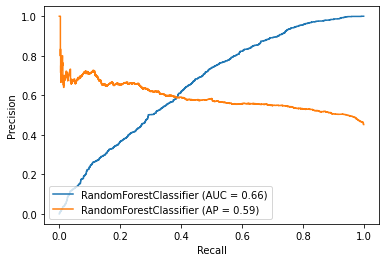

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve
ax = plt.gca()
disp  = plot_roc_curve(rf,X_test,y_test,ax=ax)
disp_ap = plot_precision_recall_curve(rf,X_test,y_test,ax=ax)

In [0]:
predictions = rf.predict(X_test)
res_dict = evaluate_metrics(features_key='combi',model_key='Random Forest',y_test = y_test,predictions = predictions)

{'feature_key': 'combi', 'model_key': 'Random Forest', 'accuracy': 0.5995145631067961, 'roc_auc': 0.5823351957301727, 'precision_0': 0.6096256684491979, 'recall_0': 0.7549668874172185, 'f1_0': 0.6745562130177515, 'precision_1': 0.5779467680608364, 'recall_1': 0.40970350404312667, 'f1_1': 0.4794952681388013}


In [0]:
pd.DataFrame([res_dict])

,feature_key,model_key,accuracy,roc_auc,precision_0,recall_0,f1_0,precision_1,recall_1,f1_1
0,combi,Random Forest,0.599515,0.582335,0.609626,0.754967,0.674556,0.577947,0.409704,0.479495


In [0]:
res_dict = {'feature_key': 'combi', 'model_key': 'Random Forest', 'accuracy': 0.5995145631067961, 'roc_auc': 0.5823351957301727, 'precision_0': 0.6096256684491979, 'recall_0': 0.7549668874172185, 'f1_0': 0.6745562130177515, 'precision_1': 0.5779467680608364, 'recall_1': 0.40970350404312667, 'f1_1': 0.4794952681388013}

In [0]:
import pandas as pd
pd.DataFrame([res_dict]).round(2)

,feature_key,model_key,accuracy,roc_auc,precision_0,recall_0,f1_0,precision_1,recall_1,f1_1
0,combi,Random Forest,0.6,0.58,0.61,0.75,0.67,0.58,0.41,0.48


In [0]:
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
important_series = pd.Series(importances)

<BarContainer object of 63 artists>

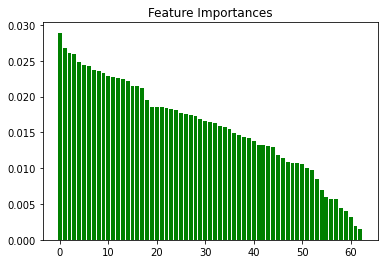

In [50]:
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], color='green', align='center')

In [0]:
df_importance = pd.DataFrame(important_series).T

In [0]:
feature_names = list(X.columns)
feature_importance = rf.feature_importances_
indices = np.argsort(feature_importance)[::-1]
important_list = []
for index in indices:
  print("{}:{}".format(feature_names[index],feature_importance[index]))
  feature_dict = {
      'feature': feature_names[index],
      'importance': feature_importance[index]
  }
  important_list.append(feature_dict)

In [0]:
df_importance = pd.DataFrame(important_list)

In [49]:
df_importance.sort_values('importance')

,feature,importance
62,calculated_host_listings_count_shared_rooms,0.001575
61,pron_count,0.001932
60,stopWords,0.003149
59,interaction_sentiment_neg,0.003985
58,access_sentiment_neg,0.004374
...,...,...
4,summary_sentiment_neu,0.024891
3,number_of_reviews_ltm,0.025989
2,number_of_reviews,0.026068
1,price,0.026779
